In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

In [29]:
# read heart disease data into pandas data frame
df = pd.read_csv(target_url, header=None, prefix="V")
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
                       'slope', 'ca', 'thal', 'num']

1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute) 

print(df.head())
print(df.tail())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.

In [30]:
# perform some data validations

# lets check for null values in the heart disease data set
df.isnull().values.any()

False

In [31]:
# find dtypes for columns, all columns should be integers
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [32]:
# it appears there are few non integer values in 'ca' and 'thal' column, need to find out and replace

# convert series datatype to numeric, changing non-numeric values to NaN
# reference - https://gist.github.com/bsweger/e5817488d161f37dcbd2

df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [33]:
# replace the NaN values with the mean value of the column
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mean())

In [34]:
# check dtypes for columns again, 'ca' and 'thal' should be float
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [35]:
summary = df.describe()
print(summary)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

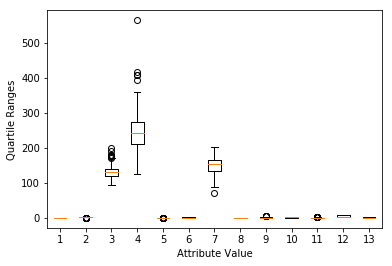

In [36]:
# box plot the real-valued attributes
# convert to array for plot routine

array = df.iloc[:,1:14].values
plot.boxplot(array)

plot.xlabel("Attribute Value")
plot.ylabel(("Quartile Ranges"))
plot.show()

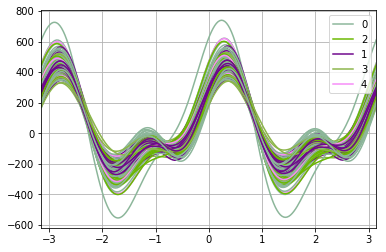

In [37]:
# Andrews curves allow one to plot multivariate data as a large number of curves 
# that are created using the attributes of samples as coefficients for Fourier series
# ignore the 'Code Number' column
from pandas.plotting import andrews_curves

andrews_curves(df, 'num')
plot.show()

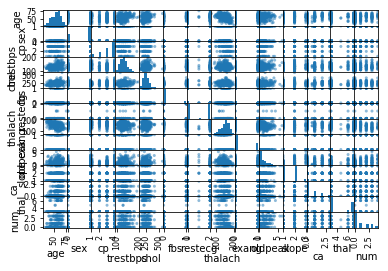

In [38]:
# scatterplot shows the relationship between two variables as dots in two dimensions
# ignore the 'Code Number' column
from pandas.plotting import scatter_matrix

scatter_matrix(df)
plot.show()

In [39]:
# getting the features and the labels

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
                       'slope', 'ca', 'thal']
X = df[features]
y = df['num']

In [40]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [43]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  0  1  1  0]
 [12  3  0  4  0]
 [ 3  2  1  6  0]
 [ 2  2  0  5  0]
 [ 1  1  1  1  0]]


In [44]:
print(y_test.values)
print(y_pred)

[0 0 3 0 2 2 1 1 3 0 1 0 0 2 0 1 3 0 0 0 1 0 0 4 0 0 0 1 3 1 0 0 0 2 1 0 0
 0 1 0 0 0 0 1 0 1 0 1 2 0 4 0 0 0 1 0 4 0 0 2 0 1 4 2 3 0 2 2 3 1 0 0 0 1
 2 0 0 3 1 0 0 0 1 0 3 3 0 2 1 2 0]
[0 0 1 0 0 1 1 1 3 0 0 0 2 3 0 0 3 0 0 0 0 0 0 2 0 0 0 3 1 3 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2 0 0 1 1 3 0 3 3 3 0 0 0 0 3
 3 0 0 0 1 0 0 0 0 0 3 0 0 3 3 3 0]


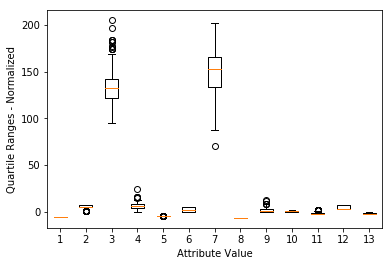

In [45]:
# renormalize columns to zero mean and unit standard deviation
# this is a common normalization and desirable for other operations like k-means clustering or k-nearest neighbors

df_norm = df.iloc[:,1:14]

for i in range(13):
    mean = summary.iloc[1,i]
    sd = summary.iloc[2,i]
    
    df_norm.iloc[:,i:(i+1)] = (df_norm.iloc[:,i:(i+1)] - mean)/sd
    
array3 = df_norm.values
plot.boxplot(array3)

plot.xlabel("Attribute Value")
plot.ylabel(("Quartile Ranges - Normalized"))
plot.show()

In [67]:
X_norm = df_norm
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)

In [68]:
# fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
# predicting the test set
y_pred = classifier.predict(X_test_norm)

In [70]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix for K-NN after normalization")
print(cm)

confusion matrix for K-NN after normalization
[[40  4  1  2  0]
 [15  2  2  0  0]
 [ 5  2  2  3  0]
 [ 5  1  1  2  0]
 [ 3  0  0  1  0]]


In [71]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_norm, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
# predicting the test set
y_pred = classifier.predict(X_test_norm)

In [73]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix for naive bayes after normalization")
print(cm)

confusion matrix for naive bayes after normalization
[[47  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0  4]]


In [ ]:
# need to understand the reason for 100% accurate prediction